In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
path='ex1data1.txt'

In [24]:
data= pd.read_csv(path, header=None)

In [26]:
print('data: \n', data.head())
print('describe: \n',data.describe())

data: 
         0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
describe: 
                0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


In [ ]:
#rename the indixes from 0 1 to po.. pro.. 

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


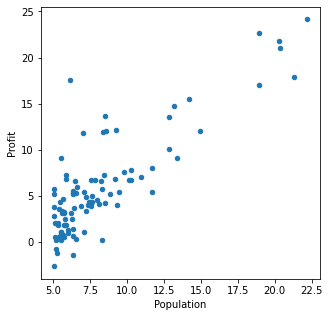

In [30]:
data=pd.read_csv(path, header=None, names=['Population', 'Profit'])
print(data.head())

#plot the data

data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [34]:
data.insert(0, 'Ones', 1)

ValueError: ignored

In [35]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [38]:
#separete x from y (training data & target)

cols = data.shape[1] # 1000 * 3 [0]= 1000 [1]= 3 
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

print('Training data: \n', X.head())
print('Target: \n', y.head())

Training data: 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
Target: 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [43]:
#convert from dataframe to numpy matrices

X = np.matrix(X)
y = np.matrix(y)

print(X)
print(y)

theta = np.matrix(np.array([0,0]))
print(theta)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [44]:
print(X.shape, y.shape, theta.shape)

(97, 2) (97, 1) (1, 2)


In [47]:
#Cost function

def computeCost(X, y, theta):
  z = np.power(((X*theta.T) - y), 2)
  return np.sum(z) / (2*len(X))

print (computeCost(X, y, theta))

32.072733877455676


In [49]:
#Gradient descent

def GD(X, y, theta, alpha, num_iterations):
  temp = np.matrix(np.zeros(theta.shape)) #matrix with 2 rows
  parameters = int(theta.ravel().shape[1]) #2
  cost = np.zeros(num_iterations) #matrix with 1000 rows

  for i in range(num_iterations):
    error = (X*theta.T) - y # h(theta) - y

    for j in range(parameters): #0 > 1
      term = np.multiply(error, X[:,j]) 
      temp[0,j] = theta[0,j] - ((alpha / len(X))) * np.sum(term)
    
    theta = temp #update theta
    cost[i] = computeCost(X, y, theta)
  
  return theta, cost

In [69]:
alpha = 0.001
num_iterations = 1000

g, cost = GD(X,y, theta, alpha,num_iterations)
print('g: ',g)
print('cost: ',cost)

[[0. 0.]]
2
g:  [[-0.57607021  0.8595327 ]]
cost:  [27.94761975 24.47289937 21.54601437 19.08057847 17.00382734 15.25447061
 13.7808826  12.5395783  11.49392969 10.61308452  9.87105552  9.24595327
  8.71934001  8.27568536  7.90190791  7.58698897  7.32164737  7.09806546
  6.90965833  6.75087941  6.61705675  6.50425513  6.40915982  6.32897881
  6.26136035  6.20432352  6.15619976  6.11558363  6.08129131  6.05232565
  6.02784674  6.00714709  5.98963081  5.97479594  5.9622197   5.95154595
  5.94247473  5.93475337  5.92816904  5.92254248  5.91772269  5.91358249
  5.91001473  5.90692918  5.90424984  5.90191267  5.89986376  5.89805767
  5.89645614  5.89502695  5.89374295  5.89258128  5.89152267  5.8905509
  5.88965231  5.88881538  5.88803043  5.88728928  5.88658506  5.88591197
  5.88526513  5.88464043  5.88403441  5.88344416  5.88286721  5.88230149
  5.88174527  5.88119707  5.88065566  5.88012     5.87958921  5.87906254
  5.87853939  5.87801921  5.87750158  5.87698612  5.87647251  5.87596049
 

In [70]:
print(computeCost(X, y, g))

5.480269332020322


In [71]:
#get the min of population & the max of profit than / it in 100 parts
x = np.linspace(data.Population.min(), data.Profit.max(), 100)
print(o)

print(g)

[ 5.0269      5.22003232  5.41316465  5.60629697  5.79942929  5.99256162
  6.18569394  6.37882626  6.57195859  6.76509091  6.95822323  7.15135556
  7.34448788  7.5376202   7.73075253  7.92388485  8.11701717  8.31014949
  8.50328182  8.69641414  8.88954646  9.08267879  9.27581111  9.46894343
  9.66207576  9.85520808 10.0483404  10.24147273 10.43460505 10.62773737
 10.8208697  11.01400202 11.20713434 11.40026667 11.59339899 11.78653131
 11.97966364 12.17279596 12.36592828 12.55906061 12.75219293 12.94532525
 13.13845758 13.3315899  13.52472222 13.71785455 13.91098687 14.10411919
 14.29725152 14.49038384 14.68351616 14.87664848 15.06978081 15.26291313
 15.45604545 15.64917778 15.8423101  16.03544242 16.22857475 16.42170707
 16.61483939 16.80797172 17.00110404 17.19423636 17.38736869 17.58050101
 17.77363333 17.96676566 18.15989798 18.3530303  18.54616263 18.73929495
 18.93242727 19.1255596  19.31869192 19.51182424 19.70495657 19.89808889
 20.09122121 20.28435354 20.47748586 20.67061818 20

In [72]:
f = g[0,0] + g[0,1]*x # H(theta) = thetha0 + theta*x
print(f)

[ 3.74471471  3.91071826  4.07672181  4.24272536  4.4087289   4.57473245
  4.740736    4.90673954  5.07274309  5.23874664  5.40475019  5.57075373
  5.73675728  5.90276083  6.06876437  6.23476792  6.40077147  6.56677502
  6.73277856  6.89878211  7.06478566  7.2307892   7.39679275  7.5627963
  7.72879985  7.89480339  8.06080694  8.22681049  8.39281403  8.55881758
  8.72482113  8.89082468  9.05682822  9.22283177  9.38883532  9.55483886
  9.72084241  9.88684596 10.05284951 10.21885305 10.3848566  10.55086015
 10.71686369 10.88286724 11.04887079 11.21487434 11.38087788 11.54688143
 11.71288498 11.87888853 12.04489207 12.21089562 12.37689917 12.54290271
 12.70890626 12.87490981 13.04091336 13.2069169  13.37292045 13.538924
 13.70492754 13.87093109 14.03693464 14.20293819 14.36894173 14.53494528
 14.70094883 14.86695237 15.03295592 15.19895947 15.36496302 15.53096656
 15.69697011 15.86297366 16.0289772  16.19498075 16.3609843  16.52698785
 16.69299139 16.85899494 17.02499849 17.19100203 17.35

Text(0.5, 1.0, 'Predicted Profit vs Population Size')

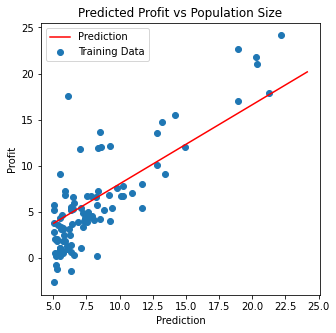

In [73]:
#plot best fit line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Prediction')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')

Text(0.5, 1.0, 'Error vs Training Epoch')

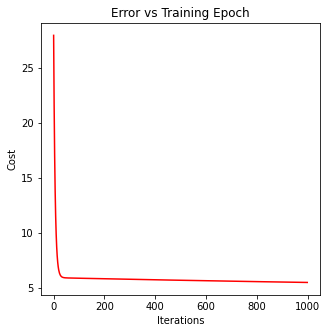

In [74]:
#plot the cost graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(num_iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')